间隔  116
50% x轴坐标: 0.734287
90% x轴坐标: 2.066547
95% x轴坐标: 2.867295
99% x轴坐标: 5.141127
间隔  104
50% x轴坐标: 0.733291
90% x轴坐标: 2.059083
95% x轴坐标: 2.816515
99% x轴坐标: 4.943211
间隔  92
50% x轴坐标: 0.733227
90% x轴坐标: 2.057659
95% x轴坐标: 2.808471
99% x轴坐标: 4.827687
cdf_picture/test_write.png


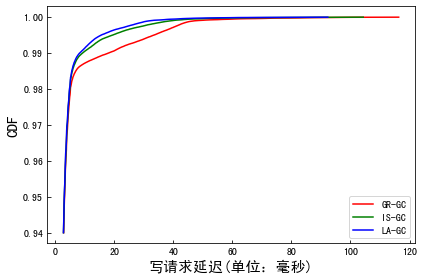

In [6]:
# 输入SSDsim的输出文件 trace out
# 输出trace名字和相应的read latency
import numpy as np
import seaborn as sns
import sys
from openpyxl import Workbook
from openpyxl.utils import get_column_letter
import pandas as pd
import scipy
import os
import sys
import matplotlib.pyplot as plt
import math
import matplotlib
from numpy import cumsum

arg1 = '/root/gitee/ssdsim_bak/ssdsim-master/result/test/4-15-1/HM_0_out'
arg2 = '/root/gitee/ssdsim_bak/ssdsim-master/result/test/4-16-2/HM_0_out'
arg3 = '/root/gitee/ssdsim_bak/ssdsim-master/result/test/4-16-1/HM_0_out'
arg4 = 'cdf_picture/test_'
# 数据输入
def get_trace_reference(filename):

    file_base = open(filename)

    flag = 0

    base_list = []

    while 1:

        base_lines = file_base.readlines(100000)

        if (not base_lines):

            break

        for base_line in base_lines:

            if str(base_line).startswith("      arrive"):

                flag = 1

                continue

            if str(base_line).startswith("the 0 channel,"):

                flag = 0

            if(flag == 1):

                if(len(base_line.split()) != 7):

                    print("error\n")

                    print(base_line.split(), len(base_line.split()))

                if(int(base_line.split()[3]) == 0):

                    base_list.append(int(base_line.split()[6]))

    file_base.close()

    return base_list


def get_hist(latencys):

    # 分割为1000份
    max_latency = max(latencys)

    min_latency = min(latencys)

    granularity = 1000000

    bins = math.ceil((max_latency-min_latency) /
                     granularity)  # ceil() 函数返回数字的上入整数。

    print("间隔 ", bins)
    counters = [0 for i in range(granularity)]

    for item in latencys:

        i = math.ceil((item-min_latency)/bins)

        if(i < 0 or i > (granularity-1)):

            print("overflow:", i)

        if(i == granularity):

            i = i-1

        if(i == granularity+1):

            i = i-2

        counters[i] = counters[i]+1

    sums = sum(counters)

    probability_counters = list(map(lambda x: x*1.0/sums, counters))

    # print(probability_counters,sum(probability_counters))

    probability_counters = cumsum(probability_counters)

    return probability_counters, [(min_latency+i*bins)/1e6 for i in range(granularity)]


base1 = get_trace_reference(arg1)
base2 = get_trace_reference(arg2)
gc = get_trace_reference(arg3)

y, x = get_hist(base1)
for (i, j) in zip(x, y):

    if(abs(j-0.5) < 0.01 or j > 0.5):

        print("50% x轴坐标:", i)

        label = i

        break


for (i, j) in zip(x, y):

    if(abs(j-0.9) < 0.01 or j > 0.9):

        print("90% x轴坐标:", i)
        break

for (i, j) in zip(x, y):

    if(abs(j-0.95) < 0.01 or j > 0.95):

        print("95% x轴坐标:", i)

        val_x = i

        break
for (i, j) in zip(x, y):

    if(abs(j-0.99) < 0.01 or j > 0.99):

        print("99% x轴坐标:", i)

        break
index = x.index(val_x)
x1 = x[index:]
y1 = y[index:]

y, x = get_hist(base2)
for (i, j) in zip(x, y):

    if(abs(j-0.5) < 0.01 or j > 0.5):

        print("50% x轴坐标:", i)

        label = i

        break


for (i, j) in zip(x, y):

    if(abs(j-0.9) < 0.01 or j > 0.9):

        print("90% x轴坐标:", i)
        break

for (i, j) in zip(x, y):

    if(abs(j-0.95) < 0.01 or j > 0.95):

        print("95% x轴坐标:", i)

        val_x = i

        break
for (i, j) in zip(x, y):

    if(abs(j-0.99) < 0.01 or j > 0.99):

        print("99% x轴坐标:", i)

        break
index = x.index(val_x)
x2 = x[index:]
y2 = y[index:]

y, x = get_hist(gc)
for (i, j) in zip(x, y):

    if(abs(j-0.5) < 0.01 or j > 0.5):

        print("50% x轴坐标:", i)

        break
for (i, j) in zip(x, y):

    if(abs(j-0.9) < 0.01 or j > 0.9):

        print("90% x轴坐标:", i)

        break
for (i, j) in zip(x, y):

    if(abs(j-0.95) < 0.01 or j > 0.95):

        print("95% x轴坐标:", i)

        val_x = i

        break
for (i, j) in zip(x, y):

    if(abs(j-0.99) < 0.01 or j > 0.99):

        print("99% x轴坐标:", i)

        break

index = x.index(val_x)
x3 = x[index:]
y3 = y[index:]


plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
# tick_params(direction='in')
ax = plt.gca()
# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
plt.ylabel("CDF", fontsize=15)
plt.xlabel(u"写请求延迟(单位：毫秒)", fontsize=15)
plt.plot(x1, y1, 'r', label="GR-GC")
plt.legend()

plt.plot(x2, y2, 'g', label="IS-GC")
plt.legend()

plt.plot(x3, y3, 'b', label="LA-GC")
plt.legend()


plt.tight_layout()

print(arg4+"write.png")
plt.savefig(arg4+"write.png", bbox_inches='tight', dpi=1000)

plt.show()


In [4]:
x1

[2.808471,
 2.808563,
 2.808655,
 2.808747,
 2.808839,
 2.808931,
 2.809023,
 2.809115,
 2.809207,
 2.809299,
 2.809391,
 2.809483,
 2.809575,
 2.809667,
 2.809759,
 2.809851,
 2.809943,
 2.810035,
 2.810127,
 2.810219,
 2.810311,
 2.810403,
 2.810495,
 2.810587,
 2.810679,
 2.810771,
 2.810863,
 2.810955,
 2.811047,
 2.811139,
 2.811231,
 2.811323,
 2.811415,
 2.811507,
 2.811599,
 2.811691,
 2.811783,
 2.811875,
 2.811967,
 2.812059,
 2.812151,
 2.812243,
 2.812335,
 2.812427,
 2.812519,
 2.812611,
 2.812703,
 2.812795,
 2.812887,
 2.812979,
 2.813071,
 2.813163,
 2.813255,
 2.813347,
 2.813439,
 2.813531,
 2.813623,
 2.813715,
 2.813807,
 2.813899,
 2.813991,
 2.814083,
 2.814175,
 2.814267,
 2.814359,
 2.814451,
 2.814543,
 2.814635,
 2.814727,
 2.814819,
 2.814911,
 2.815003,
 2.815095,
 2.815187,
 2.815279,
 2.815371,
 2.815463,
 2.815555,
 2.815647,
 2.815739,
 2.815831,
 2.815923,
 2.816015,
 2.816107,
 2.816199,
 2.816291,
 2.816383,
 2.816475,
 2.816567,
 2.816659,
 2.816751,

In [5]:
x3

[2.808471,
 2.808563,
 2.808655,
 2.808747,
 2.808839,
 2.808931,
 2.809023,
 2.809115,
 2.809207,
 2.809299,
 2.809391,
 2.809483,
 2.809575,
 2.809667,
 2.809759,
 2.809851,
 2.809943,
 2.810035,
 2.810127,
 2.810219,
 2.810311,
 2.810403,
 2.810495,
 2.810587,
 2.810679,
 2.810771,
 2.810863,
 2.810955,
 2.811047,
 2.811139,
 2.811231,
 2.811323,
 2.811415,
 2.811507,
 2.811599,
 2.811691,
 2.811783,
 2.811875,
 2.811967,
 2.812059,
 2.812151,
 2.812243,
 2.812335,
 2.812427,
 2.812519,
 2.812611,
 2.812703,
 2.812795,
 2.812887,
 2.812979,
 2.813071,
 2.813163,
 2.813255,
 2.813347,
 2.813439,
 2.813531,
 2.813623,
 2.813715,
 2.813807,
 2.813899,
 2.813991,
 2.814083,
 2.814175,
 2.814267,
 2.814359,
 2.814451,
 2.814543,
 2.814635,
 2.814727,
 2.814819,
 2.814911,
 2.815003,
 2.815095,
 2.815187,
 2.815279,
 2.815371,
 2.815463,
 2.815555,
 2.815647,
 2.815739,
 2.815831,
 2.815923,
 2.816015,
 2.816107,
 2.816199,
 2.816291,
 2.816383,
 2.816475,
 2.816567,
 2.816659,
 2.816751,